In [9]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
# Specify relative path to the file
file_path = "../database/CreditCard_CLEANED.csv"

# Load data into a pandas DataFrame
df = pd.read_csv(file_path)


Queremos responder se a coluna "Tenure Months" (que indica a quantidade total de meses que o cliente esteve com a empresa) tem influência na coluna "Monthly Charges" (que indica a cobrança mensal total atual do cliente por todos os seus serviços da empresa). Ou seja, queremos responder se a cobrança mensal aumenta com o tempo de permanência do usuário na empresa.

In [18]:

df = df[['Tenure Months', 'Monthly Charges']].copy()

df['intercept'] = 1

model = sm.OLS(df['Monthly Charges'], df[['intercept', 'Tenure Months']])

# Ajustar o modelo aos dados
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Monthly Charges   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     461.0
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           4.09e-99
Time:                        21:56:51   Log-Likelihood:                -33745.
No. Observations:                7043   AIC:                         6.749e+04
Df Residuals:                    7041   BIC:                         6.751e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        54.9298      0.575     95.570

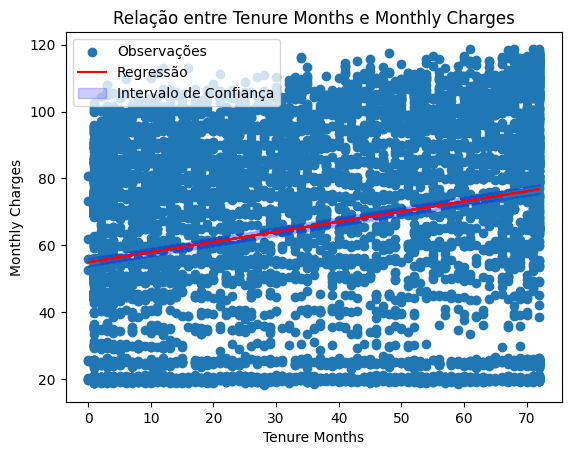

In [19]:

# Obter os valores previstos
df['predicted'] = results.predict(df[['intercept', 'Tenure Months']])

# Obter os intervalos de confiança
ci = results.get_prediction(df[['intercept', 'Tenure Months']]).conf_int()

# Plotar os pontos e a linha de regressão
plt.scatter(df['Tenure Months'], df['Monthly Charges'], label='Observações')
plt.plot(df['Tenure Months'], df['predicted'], color='red', label='Regressão')

# Plotar o intervalo de confiança
plt.fill_between(df['Tenure Months'], ci[:, 0], ci[:, 1], color='blue', alpha=0.2, label='Intervalo de Confiança')

# Configurar o gráfico
plt.xlabel('Tenure Months')
plt.ylabel('Monthly Charges')
plt.title('Relação entre Tenure Months e Monthly Charges')
plt.legend()

# Exibir o gráfico
plt.show()

In [ ]:
De acordo com os dados obtidos e o gráfico temos que:

O valor de R-squared de 0.061 indica que cerca de 6.1% da variação nas "Monthly Charges" pode ser explicada pela variável "Tenure Months". Ou seja, a relação linear entre "Tenure Months" e "Monthly Charges" não é muito forte.


O valor de coeficiente para a variável "Tenure Months" é 0.3037. Isso significa que, em média, para cada aumento de um mês no "Tenure Months", espera-se um aumento de aproximadamente 0.3037 nas "Monthly Charges". Portanto, existe uma relação positiva entre o tempo de permanência do cliente e as cobranças mensais.


O valor-p para a variável "Tenure Months" é muito próximo de zero. Isso indica que a relação entre "Tenure Months" e "Monthly Charges" é estatisticamente significativa.

O intervalo de confiança para o coeficiente de "Tenure Months" é de 0.276 a 0.331. Isso significa que estamos 95% confiantes de que o coeficiente real está dentro desse intervalo. O intervalo não inclui o valor zero, o que sugere que a variável "Tenure Months" tem um efeito significativo nas "Monthly Charges".


Conclusão:
No geral, com base nos resultados, podemos concluir que há uma relação positiva significativa entre "Tenure Months" e "Monthly Charges". No entanto, o coeficiente de determinação (R-squared) indica que a variável "Tenure Months" sozinha explica apenas uma pequena parte da variação nas "Monthly Charges". Temos outras hipóteses que podem explicar essa variação, como a contratação de novos serviços de um mês para o outro, por exemplo.